In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Section1 - Load and visualize data
- Download
- Load
- Visualize
- Normalization

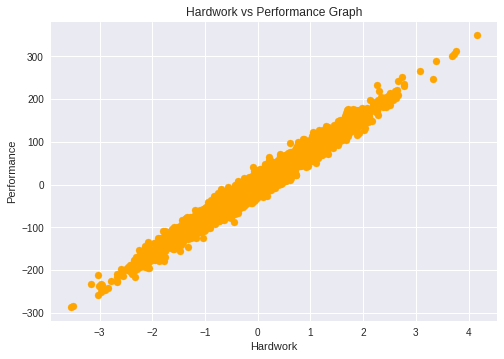

In [11]:
X = pd.read_csv('./Linear_X_Train.csv')
Y = pd.read_csv('./Linear_Y_Train.csv')

# convert to numpy arrays
X = X.values
Y = Y.values

# normalize X
u, std = X.mean(), X.std()
X = (X - u)/std

#visualize
plt.style.use('seaborn')
plt.scatter(X, Y, color='orange')
plt.title('Hardwork vs Performance Graph')
plt.xlabel('Hardwork')
plt.ylabel('Performance')
plt.show()

In [12]:
X.shape, Y.shape

((3750, 1), (3750, 1))

In [13]:
type(X)

numpy.ndarray

## Section 2 - Linear Regression

In [18]:
def hypothesis(x, theta):
    
    # theta = [theta0, theta1]
    
    y_ = theta[0] + theta[1]*x
    return y_
    
def gradient(X, Y, theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        x = X[i]
        y_ = hypothesis(x, theta)
        y = Y[i]
        grad[0] += (y_ - y)
        grad[1] += (y_ - y)*x
        
    return grad/m

def error(X, Y, theta):
    m = X.shape[0]
    total_error = 0.0
    for i in range(m):
        y_ = hypothesis(X[i], theta)
        total_error += (y_ - Y[i])**2
        
    return total_error/m

def gradientDescent(X, Y, max_steps = 100, learning_rate=0.1):
    
    theta = np.zeros((2,))
    error_list = []
    
    for i in range(max_steps):
        
        #compute grad
        grad = gradient(X, Y, theta)
        e = error(X, Y, theta)
        error_list.append(e)
        #update theta
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
    return theta, error_list

In [19]:
theta, error_list = gradientDescent(X, Y)

In [20]:
theta

array([ 0.6838508 , 79.90361453])

In [21]:
error_list

[array([6576.35005246]),
 array([5363.12510257]),
 array([4380.41289317]),
 array([3584.41600355]),
 array([2939.65852295]),
 array([2417.40496367]),
 array([1994.37958066]),
 array([1651.72902041]),
 array([1374.18206661]),
 array([1149.36903404]),
 array([967.27047765]),
 array([819.77064698]),
 array([700.29578413]),
 array([603.52114523]),
 array([525.13368772]),
 array([461.63984713]),
 array([410.20983626]),
 array([368.55152745]),
 array([334.80829731]),
 array([307.47628091]),
 array([285.33734761]),
 array([267.40481165]),
 array([252.87945752]),
 array([241.11392067]),
 array([231.58383582]),
 array([223.8644671]),
 array([217.61177843]),
 array([212.54710061]),
 array([208.44471157]),
 array([205.12177646]),
 array([202.43019901]),
 array([200.25002128]),
 array([198.48407732]),
 array([197.05366271]),
 array([195.89502687]),
 array([194.95653185]),
 array([194.19635088]),
 array([193.58060429]),
 array([193.08184956]),
 array([192.67785822]),
 array([192.35062524]),
 array(

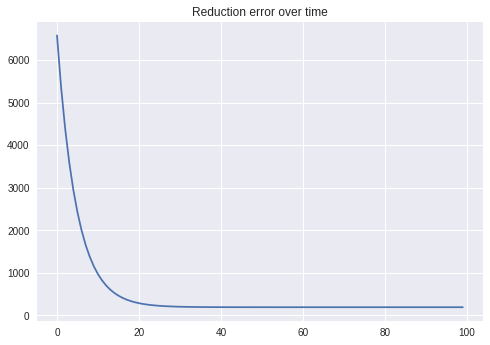

In [24]:
plt.plot(error_list)
plt.title("Reduction error over time")
plt.show()

### Section3 - Prediction and best line

In [25]:
y_ = hypothesis(X, theta)
print(y_)

[[-19.5733619 ]
 [-43.69571729]
 [ 86.4848761 ]
 ...
 [-20.85044708]
 [138.70197319]
 [-35.87897262]]


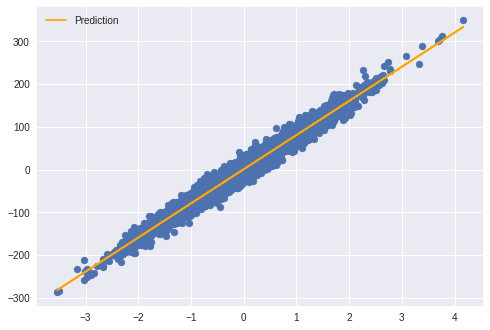

In [27]:
# Training + Prediction
plt.scatter(X, Y)
plt.plot(X, y_, color='orange', label="Prediction")
plt.legend()
plt.show()